In [ ]:
# Part A: Event Storage Structure
# First Implementation: Array-based list

# Event Class
class event:
    def __init__(self, id, title, date, time, location):
        self.id = id
        self.title = title
        self.date = date
        self.time = time
        self.location = location
    def __repr__(self):
        return(f"id: {self.id}\ntitle: {self.title}\ndate: {self.date}\ntime: {self.time}\nlocation: {self.location}")
# test Event Class
testEvent = event(0, 'hackathon', '2011-10-10', '20:00', 'Main Campus')
testEvent1 = event(1, 'meeting', '2011-10-10', '20:00', 'Main Campus')
testEvent2 = event(2, 'sports', '2011-10-10', '20:00', 'Main Campus')
testEvent3 = event(3, 'music', '2011-10-10', '20:00', 'Main Campus')

#1. Array-based list (dynamic sizing)
class EventList:
    def __init__(self, capacity):
        self.size = 0
        self.eventArr = []
        self.capacity = capacity

    #return the event list
    def __repr__(self):
        return(f"Event list: {self.eventArr[:(self.size)]}")

    #return the size of the event list
    def __len__(self):
        return(self.size)

    #INSERT OPERATION
    def insertEvent(self, event):
        if self.capacity - self.size != 0:
            self.eventArr.insert(0, event)
            #print(f'Event {event.title} is added to the list')
            self.size += 1
        else:
            new_arr = []
            for i in range(len(self.eventArr)):
                new_arr.append(self.eventArr[i])
            self.eventArr = new_arr
            self.capacity *= 2
            self.eventArr.insert(0, event)
            #print(f'Event {event.title} is added to the list')
            self.size += 1

    #SEACH-BY-ID OPERATION
    def searchById(self, searchId):
        found = False
        for i in range(len(self.eventArr)):
            if self.eventArr[i].id == searchId:
                found = True
                print(f"The matching event is {self.eventArr[i].title}")
        if found == False:
            print(f"No matching event based on event ID {searchId}")

    #DELETE OPERATION:
    #Find the integer index, or -1 if not found
    def getIndex(self, eventId):
        for i in range(self.size):
            if self.eventArr[i].id == eventId:
                return i
        return -1

    def deleteEvent (self, event):
        deleteIndex = self.getIndex(event.id)
        if deleteIndex == -1:
            print(f"Event {event.title} not found")
        else:
            for i in range (deleteIndex, self.size - 1):
                self.eventArr[i] = self.eventArr[i + 1]
            self.size -= 1
            print(f'Event {event.title} is deleted')

    #LIST-ALL OPERATION
    def listAllEvents(self):
        for i in range(self.size):
            print(f"{self.eventArr[i]}")

#TESTING ARRAY-BASED LIST

#testList = EventList(1)
# testing inserting event

#testList.insertEvent(testEvent1)
#testList.insertEvent(testEvent2)
#testList.insertEvent(testEvent3)
#print(testList)
#print(f'The array size is {len(testList)}')

# testing search by id
#print(testList.searchById(3))

#testing delete event
#testList.deleteEvent(testEvent1)
#print(testList)

#testList.listAllEvents()


#Second Implementation: Singly linked list
#Node Class
class Node:
    def __init__(self, data, next):
        self.data = data
        self.next = next

#Linked List class
class linkedList:
    def __init__(self):
        self.head = None
        self.size = 0

    #Display linked list
    def __str__(self):
        temp = self.head
        toPrint = ""
        while temp:
            toPrint += f"{temp.data} -> "
            temp = temp.next
        return toPrint

    # Return size of linked list
    def __len__(self):
        return self.size

    # Insertion at a particular position
    def insert(self,event,pos):
        temp_node=Node(event, None)
        #If linked list is empty or we need to insert at the beg of the list
        if pos==0 or self.head is None:
            temp_node.next=self.head
            self.head=temp_node
            self.size += 1
            return
        # insertion in the middle or end
        current=self.head
        count=0
        while current.next and count< pos-1:
            current=current.next
            count=count+1

        if count==pos-1:
            temp_node.next=current.next
            current.next=temp_node
            self.size += 1
            return


    # event deletion
    def deleteEvent(self, event_id):
        current=self.head
        prev=None

        #empty list
        if current is None:
            print("Empty list!")
            return

        #Deletion of head node
        if current.data.id == event_id:
            self.head=current.next
            self.size -= 1
            return

        #Deletion in the middle
        while current and current.data.id!=event_id:
            prev=current
            current=current.next
        #event_id not found
        if current is None:
            print("event id invalid")
            return

        else:
            prev.next=current.next
            self.size -= 1
            return


    #Search by id
    def searchbyId(self,event_id):
        current=self.head
        pos=0
        while current:
            if current.data.id==event_id:
                print(f"event found at node {pos} !")
                pos+=1
                return
            current=current.next
            pos+=1
        print("No matching id found!")
        return




#TESTING LINKED LIST
# node1 = Node(1, node2)
# node2 = Node(2, None)

#testLinkedList = linkedList()
#testLinkedList.insert(testEvent1, 0)
#testLinkedList.insert(testEvent2, 0)
#print(testLinkedList)

#testLinkedList.deleteEvent(2)
#testLinkedList.searchbyId(1)

In [ ]:
#  Insert at Head (pos 0, empty list)
testLinkedList.insert(testEvent1, 0)
print(testLinkedList)

#  Insert at Head (pos 0, non-empty list)
testLinkedList.insert(testEvent2, 0)
print(testLinkedList)

#  Insert at End (pos 2, list size 2)
testLinkedList.insert(testEvent3, 2)
print(testLinkedList)

#  Insert in Middle (pos 1)
testLinkedList.insert(testEvent, 1)
print(testLinkedList)

#  Search for Head (ID 2)
testLinkedList.searchbyId(2)

#  Search for Tail (ID 3)
testLinkedList.searchbyId(3)

#  Search for Middle (ID 0)
testLinkedList.searchbyId(0)

#  Search for Non-existent ID
testLinkedList.searchbyId(999)

# Delete Middle (ID 1: E1)
testLinkedList.deleteEvent(1)
print(testLinkedList)
print(len(testLinkedList)) # Should be 3

# Delete Head (ID 2: E2)
testLinkedList.deleteEvent(2)
print(testLinkedList)
print(len(testLinkedList)) # Should be 2

# Delete Tail (ID 3: E3)
testLinkedList.deleteEvent(3)
print(testLinkedList)
print(len(testLinkedList)) # Should be 1

# Delete last item (ID 0: E0)
testLinkedList.deleteEvent(0)
print(testLinkedList)
print(len(testLinkedList)) # Should be 0

#  Delete from Empty List
testLinkedList.deleteEvent(5) # Should print error
print(testLinkedList)

#  Attempt to Delete Non-existent ID in Empty List (already covered by 15, but tests resilience)
testLinkedList.deleteEvent(99)

NameError: name 'testLinkedList' is not defined

In [ ]:
from datetime import datetime
import random, time
import matplotlib.pyplot as plt

#compare events chronologically
def event_key(event):
    """Convert event date+time to datetime object for comparison."""
    return datetime.strptime(event.date + " " + event.time, "%Y-%m-%d %H:%M")

# Insertion Sort
def insertion_sort(events):
    arr = events[:]
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and event_key(arr[j]) > event_key(key):
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr


# Merge Sort
def merge_sort(events):
    if len(events) <= 1:
        return events
    mid = len(events) // 2
    left = merge_sort(events[:mid])
    right = merge_sort(events[mid:])
    return merge(left, right)

def merge(left, right):
    merged = []
    i = j = 0
    while i < len(left) and j < len(right):
        if event_key(left[i]) <= event_key(right[j]):
            merged.append(left[i]); i += 1
        else:
            merged.append(right[j]); j += 1
    merged.extend(left[i:])
    merged.extend(right[j:])
    return merged


# Quick Sort
def quick_sort(events):
    if len(events) <= 1:
        return events
    pivot = event_key(events[len(events)//2])
    left = [x for x in events if event_key(x) < pivot]
    middle = [x for x in events if event_key(x) == pivot]
    right = [x for x in events if event_key(x) > pivot]
    return quick_sort(left) + middle + quick_sort(right)

In [ ]:
# Array backend
def sort_array_backend(event_list, sort_func):
    """Sort array-based event list using chosen algorithm."""
    events_to_sort = event_list.eventArr[:event_list.size]
    sorted_events = sort_func(events_to_sort)
    event_list.eventArr[:event_list.size] = sorted_events
    print(f"Sorted {len(sorted_events)} events using {sort_func.__name__}")


# Linked List backend
def sort_linked_list(linked_list, sort_func):
    """Sort linked list backend using chosen algorithm."""
    arr = []
    curr = linked_list.head
    while curr:
        arr.append(curr.data)
        curr = curr.next

    arr = sort_func(arr)

    curr = linked_list.head
    for e in arr:
        curr.data = e
        curr = curr.next

    print(f"Sorted {len(arr)} linked-list events using {sort_func.__name__}")

In [ ]:
# Event Generation
def generate_events(n):
    events = []
    for i in range(n):
        events.append(event(
            i,
            f"Event{i}",
            f"2024-05-{(i % 28) + 1:02d}",
            f"{(i % 24):02d}:{(i * 7) % 60:02d}",
            "Campus Hall"
        ))
    random.shuffle(events)
    return events


# Benchmark for BOTH backend
def benchmark_algorithms_both():
    sizes = [50, 500]
    algorithms = {
        "Insertion": insertion_sort,
        "Merge": merge_sort,
        "Quick": quick_sort
    }

    results = {f"{name}_Array": [] for name in algorithms}
    results.update({f"{name}_Linked": [] for name in algorithms})

    for n in sizes:
        events = generate_events(n)

        # ARRAY BACKEND
        arr_backend = EventList(n)
        for e in events:
            arr_backend.insertEvent(e)

        for name, func in algorithms.items():
            arr_copy = arr_backend.eventArr[:arr_backend.size]
            start = time.time()
            func(arr_copy)
            end = time.time()
            runtime = end - start
            results[f"{name}_Array"].append(runtime)
            print(f"{name} Sort (Array) | n={n} | {runtime:.5f}s")

        # LINKED LIST BACKEND
        ll_backend = linkedList()
        for e in events:
            ll_backend.insert(e, 0)

        for name, func in algorithms.items():
            # Convert to array for sorting
            temp_list = []
            current = ll_backend.head
            while current:
                temp_list.append(current.data)
                current = current.next

            start = time.time()
            func(temp_list)
            end = time.time()
            runtime = end - start
            results[f"{name}_Linked"].append(runtime)
            print(f"{name} Sort (Linked) | n={n} | {runtime:.5f}s")

    return sizes, results


# Plot Results
def plot_results_both(sizes, results, title="Sorting Performance: Array vs Linked List"):
    for name in results:
        plt.plot(sizes, results[name], label=name)
    plt.xlabel("Number of Events (n)")
    plt.ylabel("Runtime (seconds)")
    plt.title(title)
    plt.legend()
    plt.xscale("log")
    plt.yscale("log")
    plt.show()

Insertion Sort (Array) | n=50 | 0.01378s
Merge Sort (Array) | n=50 | 0.00327s
Quick Sort (Array) | n=50 | 0.00660s
Insertion Sort (Linked) | n=50 | 0.00949s
Merge Sort (Linked) | n=50 | 0.00339s
Quick Sort (Linked) | n=50 | 0.00689s
Insertion Sort (Array) | n=500 | 1.25789s
Merge Sort (Array) | n=500 | 0.10903s
Quick Sort (Array) | n=500 | 0.22880s
Insertion Sort (Linked) | n=500 | 1.62702s
Merge Sort (Linked) | n=500 | 0.11052s
Quick Sort (Linked) | n=500 | 0.12356s


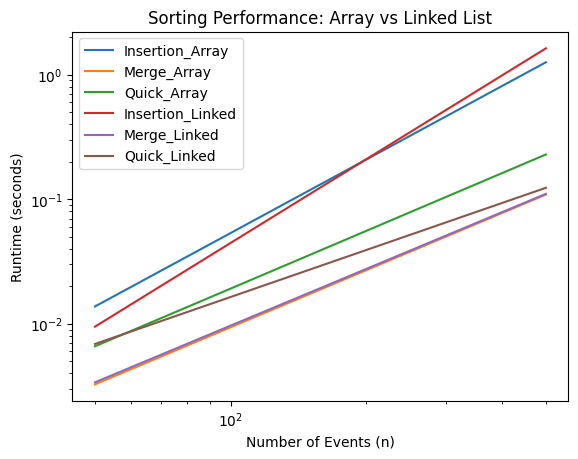

In [ ]:
sizes, results = benchmark_algorithms_both()
plot_results_both(sizes, results)

In [ ]:
# Part C. Searching & Conflict Detection
# Linear Search
# 1. Linear search: Linear search is already implemented in search-by-id method


#linear search on unsorted data
unsorted_data_linear = generate_events(500)
unsorted_arrayBasedList_linear = EventList(500)
for e in unsorted_data_linear:
  unsorted_arrayBasedList_linear.insertEvent(e)


begin = time.time()
unsorted_arrayBasedList_linear.searchById(501)
end = time.time()
print(f"Time to run linear search on unsorted data is {end - begin}")

#linear search on sorted data
def sort_array_backend_partC(event_list, sort_func):
    """Sort array-based event list using chosen algorithm."""
    events_to_sort = event_list.eventArr[:event_list.size]
    sorted_events = sort_func(events_to_sort)
    event_list.eventArr[:event_list.size] = sorted_events
    print(f"Sorted {len(sorted_events)} events using {sort_func.__name__}")
    return sorted_events

sorted_data_linear = sort_array_backend_partC(unsorted_arrayBasedList_linear, merge_sort)
begin = time.time()
unsorted_arrayBasedList_linear.searchById(501)
end = time.time()
print(f"Time to run linear search on sorted data is {end - begin}")


# 2. Binary Search

# Merge Sort on event ID (instead of using date/time)
def merge_sort_by_id(events):
    if len(events) <= 1:
        return events
    mid = len(events) // 2
    left = merge_sort_by_id(events[:mid])
    right = merge_sort_by_id(events[mid:])
    return merge_by_id(left, right)

def merge_by_id(left, right):
    merged = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i].id <= right[j].id:
            merged.append(left[i]); i += 1
        else:
            merged.append(right[j]); j += 1
    merged.extend(left[i:])
    merged.extend(right[j:])
    return merged

#Binary search
def binary_search(eventArr, eventID):
    high = len(eventArr)-1
    low = 0
    begin_binary = time.time()
    while low <= high:
      middle = low+(high-low)//2
      event_at_mid = eventArr[middle].id
      if eventID == event_at_mid:
        end_binary = time.time()
        print(f"Time for binary search (ID {eventID} found) is {end_binary - begin_binary}")
        return middle
      elif eventID > event_at_mid:
        low = middle + 1
      else:
        high = middle - 1
    end_binary = time.time()
    print(f"Time for binary search (ID {eventID} not found) is {end_binary - begin_binary}")
    return(f"No event with ID {eventID} is found")


#Sort the array by ID
unsorted_data_binary = generate_events(500)
unsorted_arrayBasedList_binary = EventList(500)
for e in unsorted_data_binary:
  unsorted_arrayBasedList_binary.insertEvent(e)

sorted_array_binary_search = sort_array_backend_partC(unsorted_arrayBasedList_binary, merge_sort_by_id)
binary_search(sorted_array_binary_search, 501)



No matching event based on event ID 501
Time to run linear search on unsorted data is 0.00022602081298828125
Sorted 500 events using merge_sort
No matching event based on event ID 501
Time to run linear search on sorted data is 0.00018715858459472656
Sorted 500 events using merge_sort_by_id
Time for binary search (ID 501 not found) is 5.0067901611328125e-06


'No event with ID 501 is found'